# Continuous Control

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [ ]:
# !pip -q install ./python

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment.

In [ ]:
#from unityagents import UnityEnvironment
#import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

#select this option to load version 2 (with 20 agents) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [ ]:
# get the default brain
# brain_name = env.brain_names[0]
# brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
# env_info = env.reset(train_mode=True)[brain_name]

# number of agents
# num_agents = len(env_info.agents)
# print('Number of agents:', num_agents)

# size of each action
# action_size = brain.vector_action_space_size
# print('Size of each action:', action_size)

# examine the state space 
# states = env_info.vector_observations
# state_size = states.shape[1]
# print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
# print('The state for the first agent looks like:', states[0])

### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [ ]:
# env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#    next_states = env_info.vector_observations         # get next state (for each agent)
#    rewards = env_info.rewards                         # get reward (for each agent)
#    dones = env_info.local_done                        # see if episode finished
#    scores += env_info.rewards                         # update the score (for each agent)
#    states = next_states                               # roll over states to next time step
#    if np.any(dones):                                  # exit loop if episode finished
#        break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [ ]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.18 which is incompatible.


In [2]:
from unityagents import UnityEnvironment

# select this option to load version 1 (with a single agent) of the environment
env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')



INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
brain_name = env.brain_names[0]
brain = env.brains[brain_name]
env_info = env.reset(train_mode=True)[brain_name]
states = env_info.vector_observations
state_size = states.shape[1]
action_size = brain.vector_action_space_size


In [4]:
from ddpg import Agent
from ddpg_train import ddpg_train

agent = Agent(state_size=state_size, action_size=action_size)
scores = ddpg_train(agent, env, brain_name)

Episode 100	Average Score: 0.77	 Episode score: 1.77
Episode 200	Average Score: 0.99	 Episode score: 0.23
Episode 300	Average Score: 1.54	 Episode score: 2.41
Episode 400	Average Score: 1.77	 Episode score: 0.80
Episode 500	Average Score: 1.81	 Episode score: 2.19
Episode 600	Average Score: 3.64	 Episode score: 1.67
Episode 700	Average Score: 8.65	 Episode score: 13.78
Episode 800	Average Score: 15.57	 Episode score: 18.36
Episode 900	Average Score: 10.57	 Episode score: 0.00
Episode 1000	Average Score: 19.39	 Episode score: 27.26
Episode 1100	Average Score: 23.40	 Episode score: 33.98
Episode 1200	Average Score: 21.21	 Episode score: 0.00
Episode 1300	Average Score: 25.20	 Episode score: 33.64
Episode 1400	Average Score: 31.58	 Episode score: 32.59


In [5]:
episodes = list(range(1, len(scores)+1))

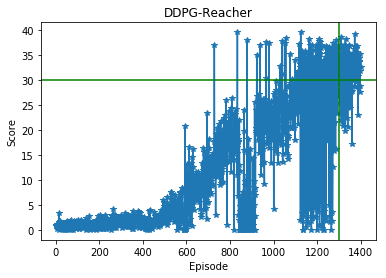

In [8]:
import matplotlib.pyplot as plt

plt.plot(episodes, scores,marker='*')
plt.title("DDPG-Reacher")
plt.xlabel("Episode")
plt.ylabel("Score")
plt.axvline(episodes[-1]-100,color='g')
plt.axhline(30,color='g')
plt.savefig('DDPG_Reacher_score.png', bbox_inches='tight')

In [9]:
env.close()